In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## First example, sickness test

Let's assume we have a test for a scikness that is correct in 99% of cases. 1% of population is sick with this desiease.
If person got positive test result, what is the chance of having this desease?

Let's try to make a model

In [2]:
num_patients = 10000
test_confidence = 0.99

positive_patients = np.random.binomial(num_patients, 0.01)
true_positives = np.random.binomial(positive_patients, test_confidence)
negative_patients = num_patients-positive_patients
false_positives = np.random.binomial(negative_patients, 1-test_confidence)

true_pos_probablity = true_positives/(true_positives+false_positives)

print(f"Positive: {positive_patients}\nDetected by test: {true_positives}\nFalse positives: {false_positives}\nProbability: {true_pos_probablity}")

Positive: 106
Detected by test: 106
False positives: 115
Probability: 0.4796380090497738


We can achive better results, repeating our Monte-Carlo test many times

0.49986153236824377

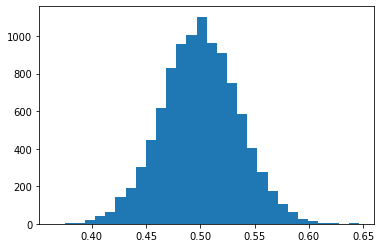

In [3]:
num_patients = 10000
test_confidence = 0.99
tests_count = 10000

def get_sick_probability(num_patients, test_confidence):
    positive_patients = np.random.binomial(num_patients, 0.01)
    true_positives = np.random.binomial(positive_patients, test_confidence)
    negative_patients = num_patients-positive_patients
    false_positives = np.random.binomial(negative_patients, 1-test_confidence)

    return true_positives/(true_positives+false_positives)

def perform_tests(count):
    for _ in range(count):
        yield get_sick_probability(num_patients, test_confidence)
        
results = np.fromiter(tqdm(perform_tests(tests_count)), float)
plt.hist(results, bins = 30)

results.mean()

## Second example, round hole in a square wall

Let's use Monte-Carlo method to find an area of circle inscribed in a square 

0.7893 0.7853981633974483


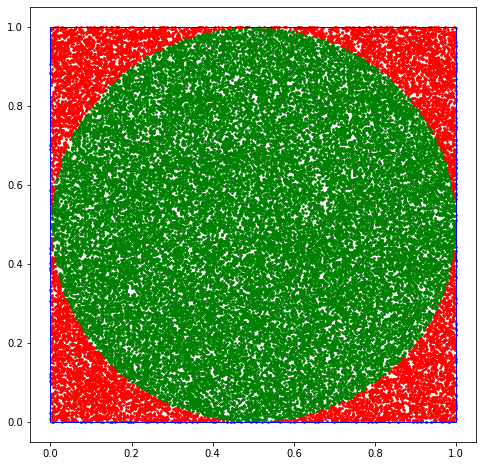

In [4]:
center = np.array([0.5, 0.5])

total = 50000
points = np.random.uniform(size=total*2).reshape(-1, 2)
dists = np.linalg.norm(points-center, axis=1)
inside = dists<=0.5
fitted = points[inside]
failed = points[~inside]

print(len(fitted)/total, np.pi*0.25)

_, ax = plt.subplots(1, figsize=(8, 8))
plt.scatter(fitted[:, 0], fitted[:, 1], s=3, color="g")
plt.scatter(failed[:, 0], failed[:, 1], s=3, color="r")
rect = plt.Rectangle((0, 0), 1, 1, edgecolor="b", fill=False)
ax.add_patch(rect)
plt.show()

## Third example, bootstrapping

Let's assume we have two sets of measturements, obtained from some experiment. What we can say about their similarity?

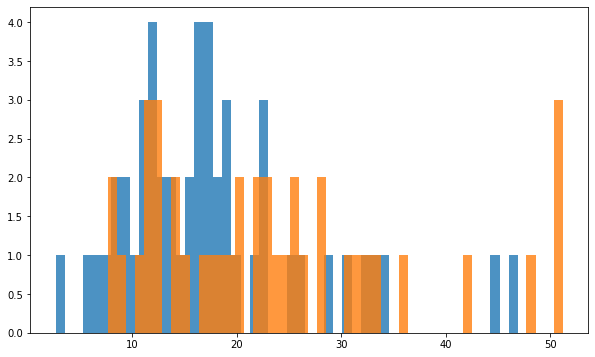

In [5]:
experiment1 = np.array([ 8.85293904, 19.30961089, 30.72161037, 11.7012241 ,  5.49410644,
       17.80528005,  9.16689433, 16.32647999, 22.35435495, 19.92788047,
       21.63465354, 12.39855657, 14.8331613 ,  8.20629758, 16.37248174,
       10.55699051, 18.89251249, 19.17855321, 10.76133287, 13.82054091,
       17.55710133, 25.66538436, 15.64562867, 15.45364694, 11.47540725,
       16.91120425, 44.66638973, 16.58434261, 46.92030093, 18.05002344,
       11.19513431, 17.41539161, 28.5528569 , 13.56360074,  6.75493823,
       31.98582162, 12.68703793,  9.23413189, 11.91389833, 25.71482855,
       12.72094361,  2.67348598, 33.80072621, 17.25334778, 33.54042444,
       12.37692857, 22.72189865,  7.76992784, 16.23439505, 22.66353471])
num_samples1 = len(experiment1)

experiment2 = np.array([26.26510211, 22.81500855, 21.96857791, 50.65756487, 32.02825417,
       12.03063166, 30.55109854, 12.29029854, 11.31268293, 17.15947496,
       22.75505368, 51.20111681, 32.36924075, 24.20404637, 18.25638994,
       33.04459753, 12.48026569, 17.53849044, 25.75273286, 51.15768687,
       48.15820651, 24.24308646, 27.93825621, 10.72173762, 11.61567508,
       20.65235374, 20.11501577, 25.34136451, 27.96135754, 19.20660311,
       35.95179356, 21.63429169, 11.8421914 , 13.80129826, 42.23723073,
       14.33249981,  9.01207862, 15.42946993,  8.32888588,  7.65824071])
num_samples2 = len(experiment2)

_ = plt.figure(figsize=(10, 6))
_ = plt.hist(experiment1, bins=50, alpha=.8)
_ = plt.hist(experiment2, bins=50, alpha=.8)

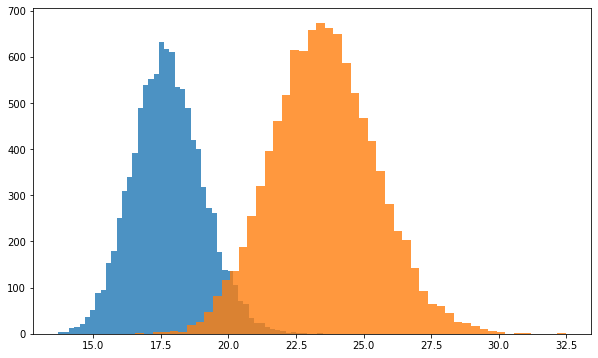

In [6]:
repeats = 10000

ex1_samples = np.array([np.random.choice(experiment1, num_samples1).mean() for i in tqdm(range(repeats))])
ex2_samples = np.array([np.random.choice(experiment2, num_samples2).mean() for i in tqdm(range(repeats))])

_ = plt.figure(figsize=(10, 6))
_ = plt.hist(ex1_samples, bins=50, alpha=.8)
_ = plt.hist(ex2_samples, bins=50, alpha=.8)

95% interval is between -10.366824439349998 and -1.357496802


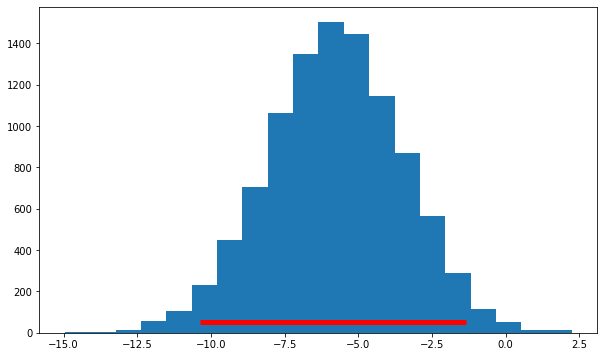

In [7]:
mean_diffs = ex1_samples - ex2_samples
mean_diffs.sort()

min_cred = mean_diffs[int(repeats*0.025)]
max_cred = mean_diffs[-int(repeats*0.025)]

_ = plt.figure(figsize=(10, 6))
_ = plt.hist(mean_diffs, bins=20)
_ = plt.hlines(y=50, xmin=min_cred, xmax=max_cred, linewidth=5, color='r')

print(f"95% interval is between {min_cred} and {max_cred}")